In [4]:
import cv2
import matplotlib.pyplot as plt

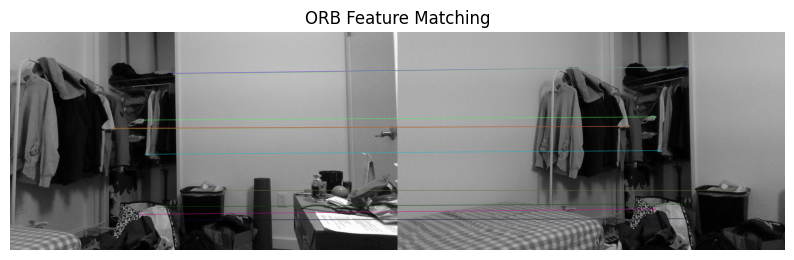

In [9]:

# Load images (replace with your image paths)
image1_path = "../Assets/feature-1_Color.png"  # Reference image
image2_path = "../Assets/feature-2_Color.png"  # Target image
image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect and compute features
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Initialize Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (lower distance = better match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 10 matches
matched_image = cv2.drawMatches(
    image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display results
plt.figure(figsize=(10, 6))
plt.imshow(matched_image)
plt.title("ORB Feature Matching")
plt.axis("off")
plt.show()

